In [7]:
import numpy as np
import pandas as pd

In [8]:
df=pd.read_csv('Fraud_check.csv')
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [5]:
df.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

In [9]:
df["Taxable.Income"] = np.where((df["Taxable.Income"]<30000), "Risky", "Good")

In [10]:
df.head(10)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,Good,50047,10,YES
1,YES,Divorced,Good,134075,18,YES
2,NO,Married,Good,160205,30,YES
3,YES,Single,Good,193264,15,YES
4,NO,Married,Good,27533,28,NO
5,NO,Divorced,Good,116382,0,NO
6,NO,Divorced,Good,80890,8,YES
7,YES,Single,Good,131253,3,YES
8,NO,Single,Good,102481,12,YES
9,YES,Divorced,Good,155482,4,YES


In [11]:
df["Taxable.Income"].value_counts()

Good     476
Risky    124
Name: Taxable.Income, dtype: int64

# One Hot Coding

In [12]:
data=pd.get_dummies(df,columns=['Undergrad','Marital.Status','Urban'], drop_first=False)

In [13]:
data.head(5)

,Taxable.Income,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
0,Good,50047,10,1,0,0,0,1,0,1
1,Good,134075,18,0,1,1,0,0,0,1
2,Good,160205,30,1,0,0,1,0,0,1
3,Good,193264,15,0,1,0,0,1,0,1
4,Good,27533,28,1,0,0,1,0,1,0


# pairplot

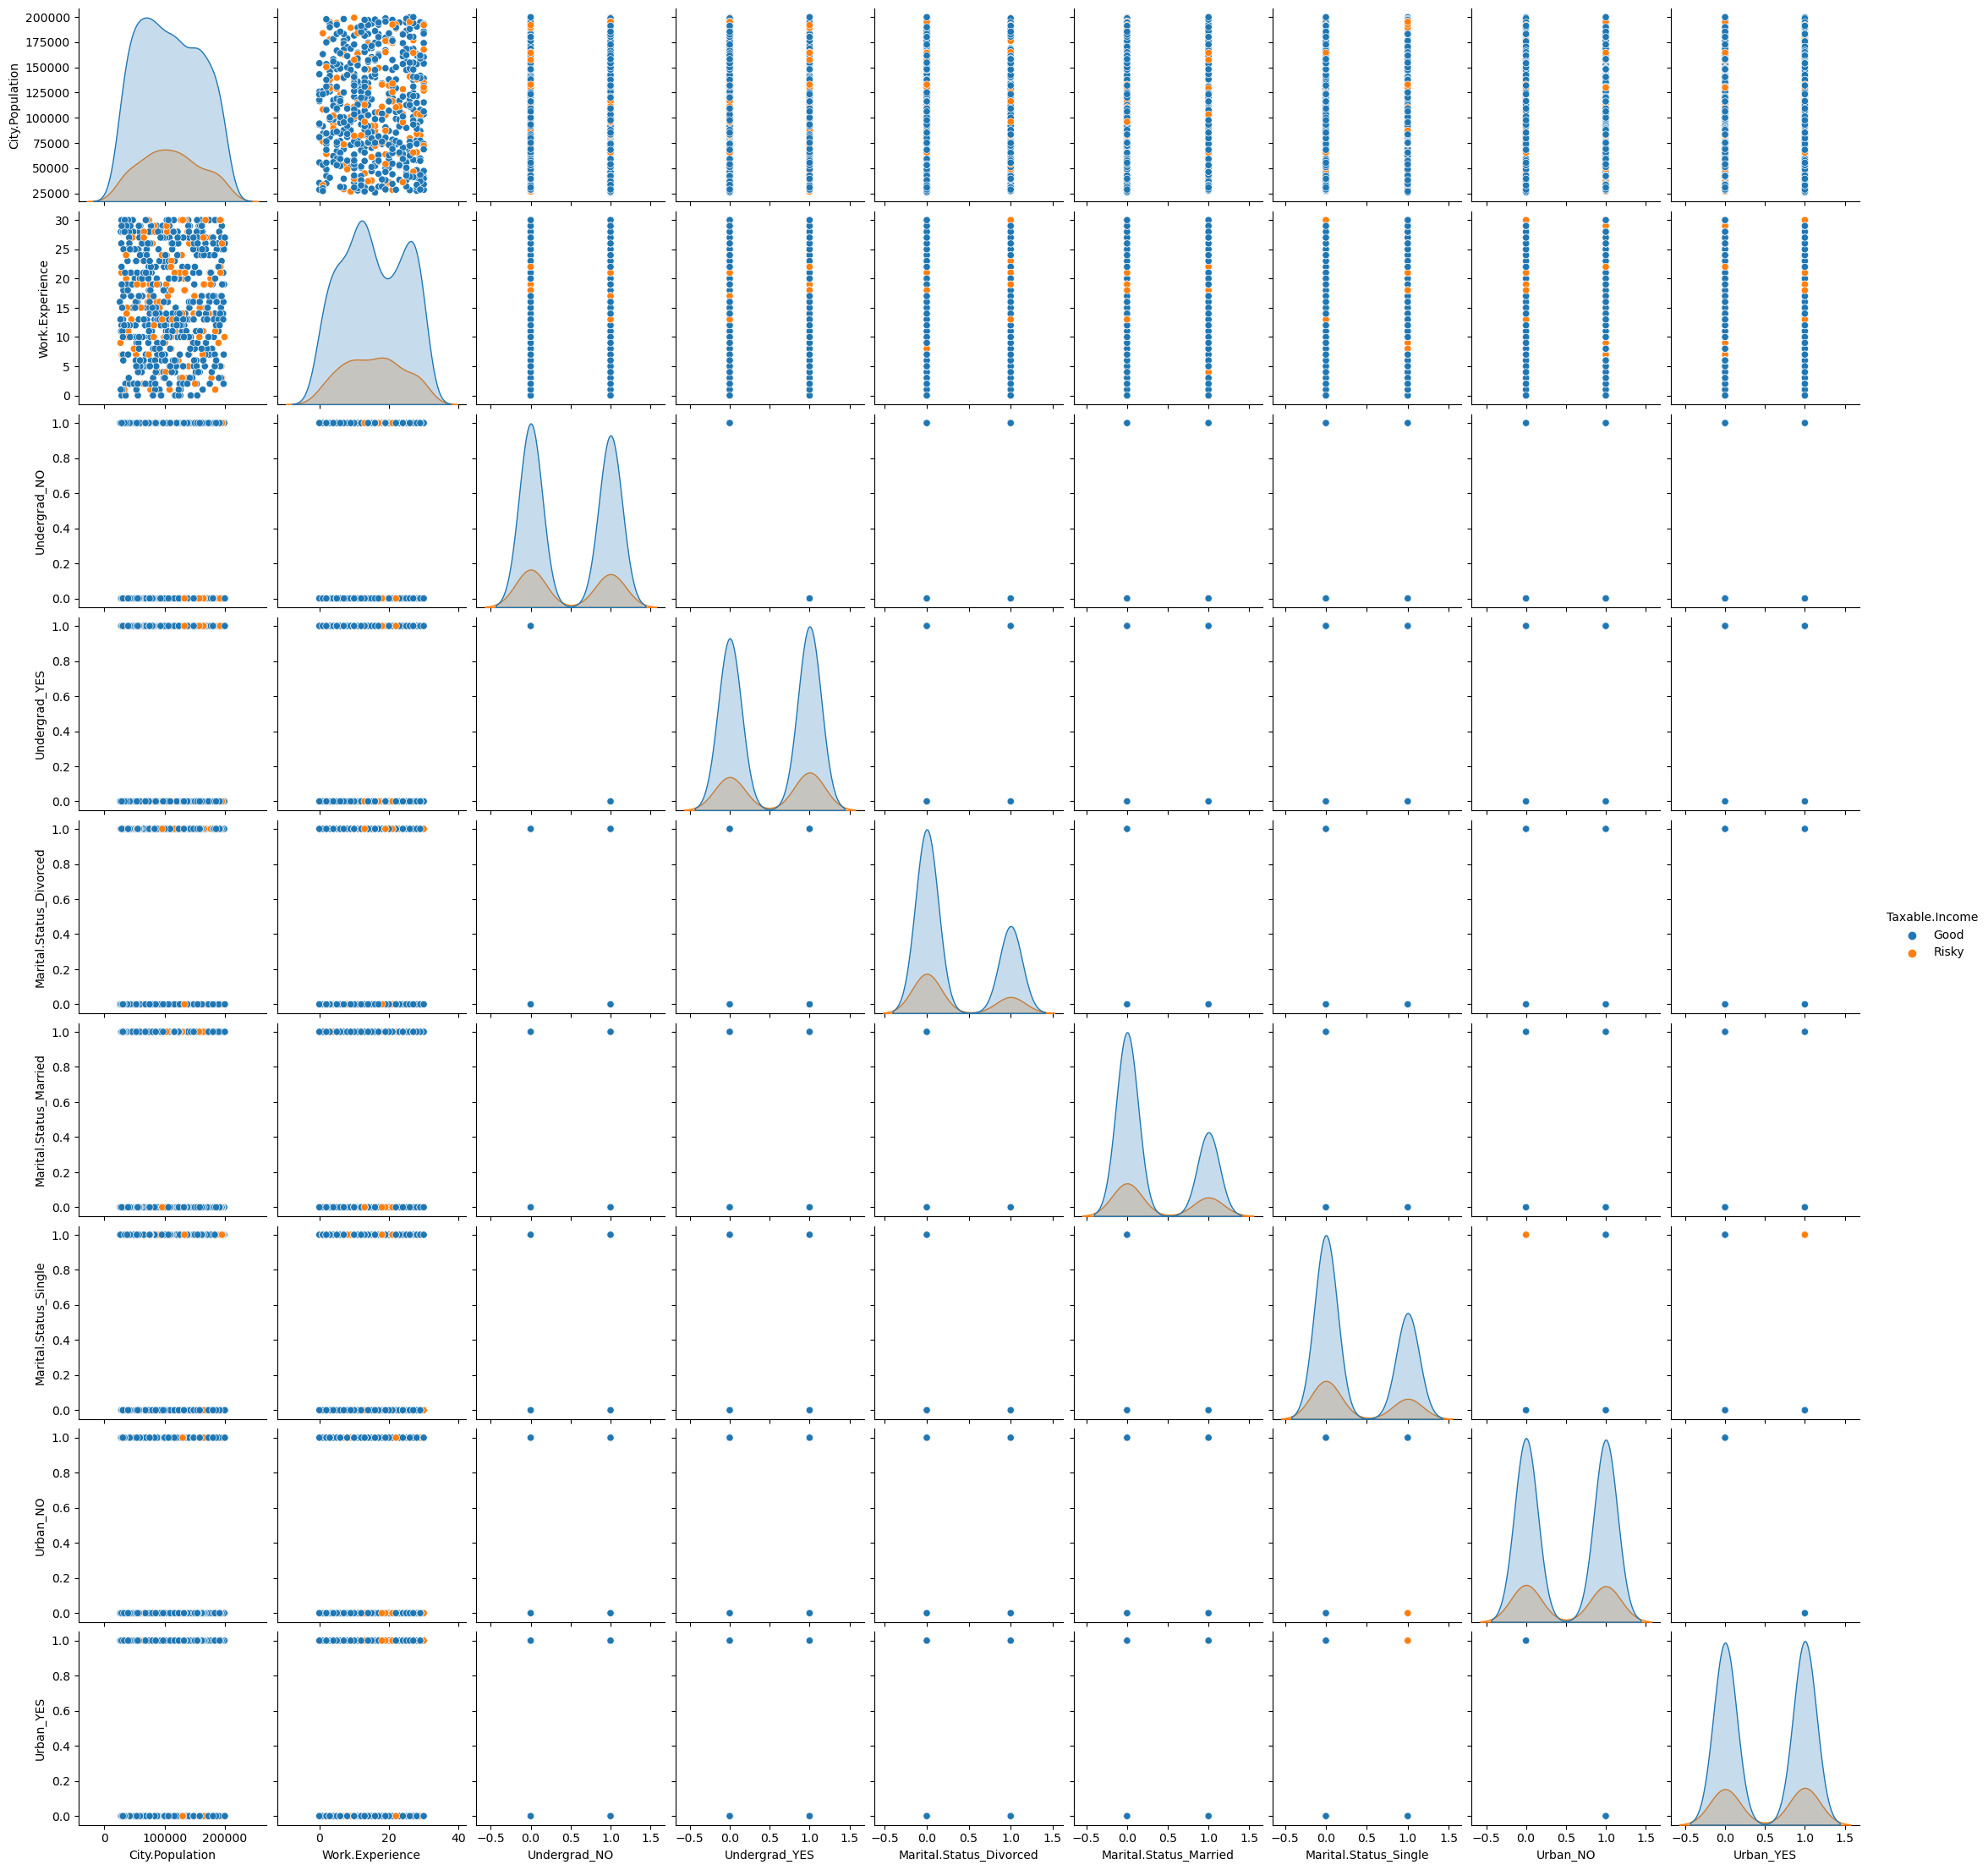

In [14]:
import seaborn as sns
sns.pairplot(data=data, hue = 'Taxable.Income')

# Labeling

labeling the target variable

In [15]:
data["Taxable.Income"] = data["Taxable.Income"].astype('category')
data["Taxable.Income"] = data["Taxable.Income"].cat.codes
data

,Taxable.Income,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
0,0,50047,10,1,0,0,0,1,0,1
1,0,134075,18,0,1,1,0,0,0,1
2,0,160205,30,1,0,0,1,0,0,1
3,0,193264,15,0,1,0,0,1,0,1
4,0,27533,28,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
595,0,39492,7,0,1,1,0,0,0,1
596,0,55369,2,0,1,1,0,0,0,1
597,0,154058,0,1,0,1,0,0,0,1
598,0,180083,17,0,1,0,1,0,1,0


# normalization of data

In [16]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

df_norm = norm_func(data)
df_norm.tail(10)

,Taxable.Income,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
590,0.0,0.341473,0.466667,1.0,0.0,0.0,1.0,0.0,0.0,1.0
591,1.0,0.615406,0.600000,0.0,1.0,0.0,0.0,1.0,0.0,1.0
592,0.0,0.283703,0.533333,0.0,1.0,0.0,0.0,1.0,1.0,0.0
593,0.0,0.610256,0.333333,1.0,0.0,1.0,0.0,0.0,0.0,1.0
594,0.0,0.412341,0.300000,1.0,0.0,0.0,1.0,0.0,0.0,1.0
595,0.0,0.078811,0.233333,0.0,1.0,1.0,0.0,0.0,0.0,1.0
596,0.0,0.170058,0.066667,0.0,1.0,1.0,0.0,0.0,0.0,1.0
597,0.0,0.737240,0.000000,1.0,0.0,1.0,0.0,0.0,0.0,1.0
598,0.0,0.886810,0.566667,0.0,1.0,0.0,1.0,0.0,1.0,0.0
599,0.0,0.760683,0.533333,1.0,0.0,1.0,0.0,0.0,1.0,0.0


deviding the data into predictor and target variable

In [17]:
X = df_norm.drop(['Taxable.Income'], axis=1)
Y = df_norm['Taxable.Income']

Splitting the data into training and testing

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=10)

# model building

In [19]:
from sklearn.tree import DecisionTreeClassifier

In [36]:
dt = DecisionTreeClassifier(random_state=42)

In [37]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [38]:
dt.fit(x_train, y_train)
y_pred_dt = dt.predict(x_test)
print("Decision Tree Results:")
print("Accuracy: ", accuracy_score(y_test, y_pred_dt))
print("Precision: ", precision_score(y_test, y_pred_dt))
print("Recall: ", recall_score(y_test, y_pred_dt))
print("F1 Score: ", f1_score(y_test, y_pred_dt))

Decision Tree Results:
Accuracy:  0.6333333333333333
Precision:  0.15384615384615385
Recall:  0.15384615384615385
F1 Score:  0.15384615384615385


In [23]:
from sklearn import tree

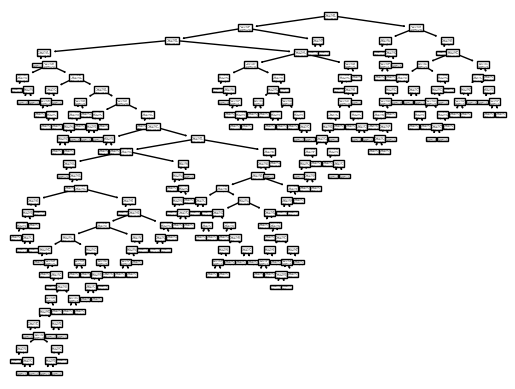

In [26]:
tree.plot_tree(dt);

# Building Decision Tree Classifier using Entropy Criteria

In [52]:
x_test.shape

(120, 9)

In [55]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=5)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [56]:
colnames = list(x_train.columns)
colnames

['City.Population',
 'Work.Experience',
 'Undergrad_NO',
 'Undergrad_YES',
 'Marital.Status_Divorced',
 'Marital.Status_Married',
 'Marital.Status_Single',
 'Urban_NO',
 'Urban_YES']

In [57]:
import matplotlib.pyplot as plt

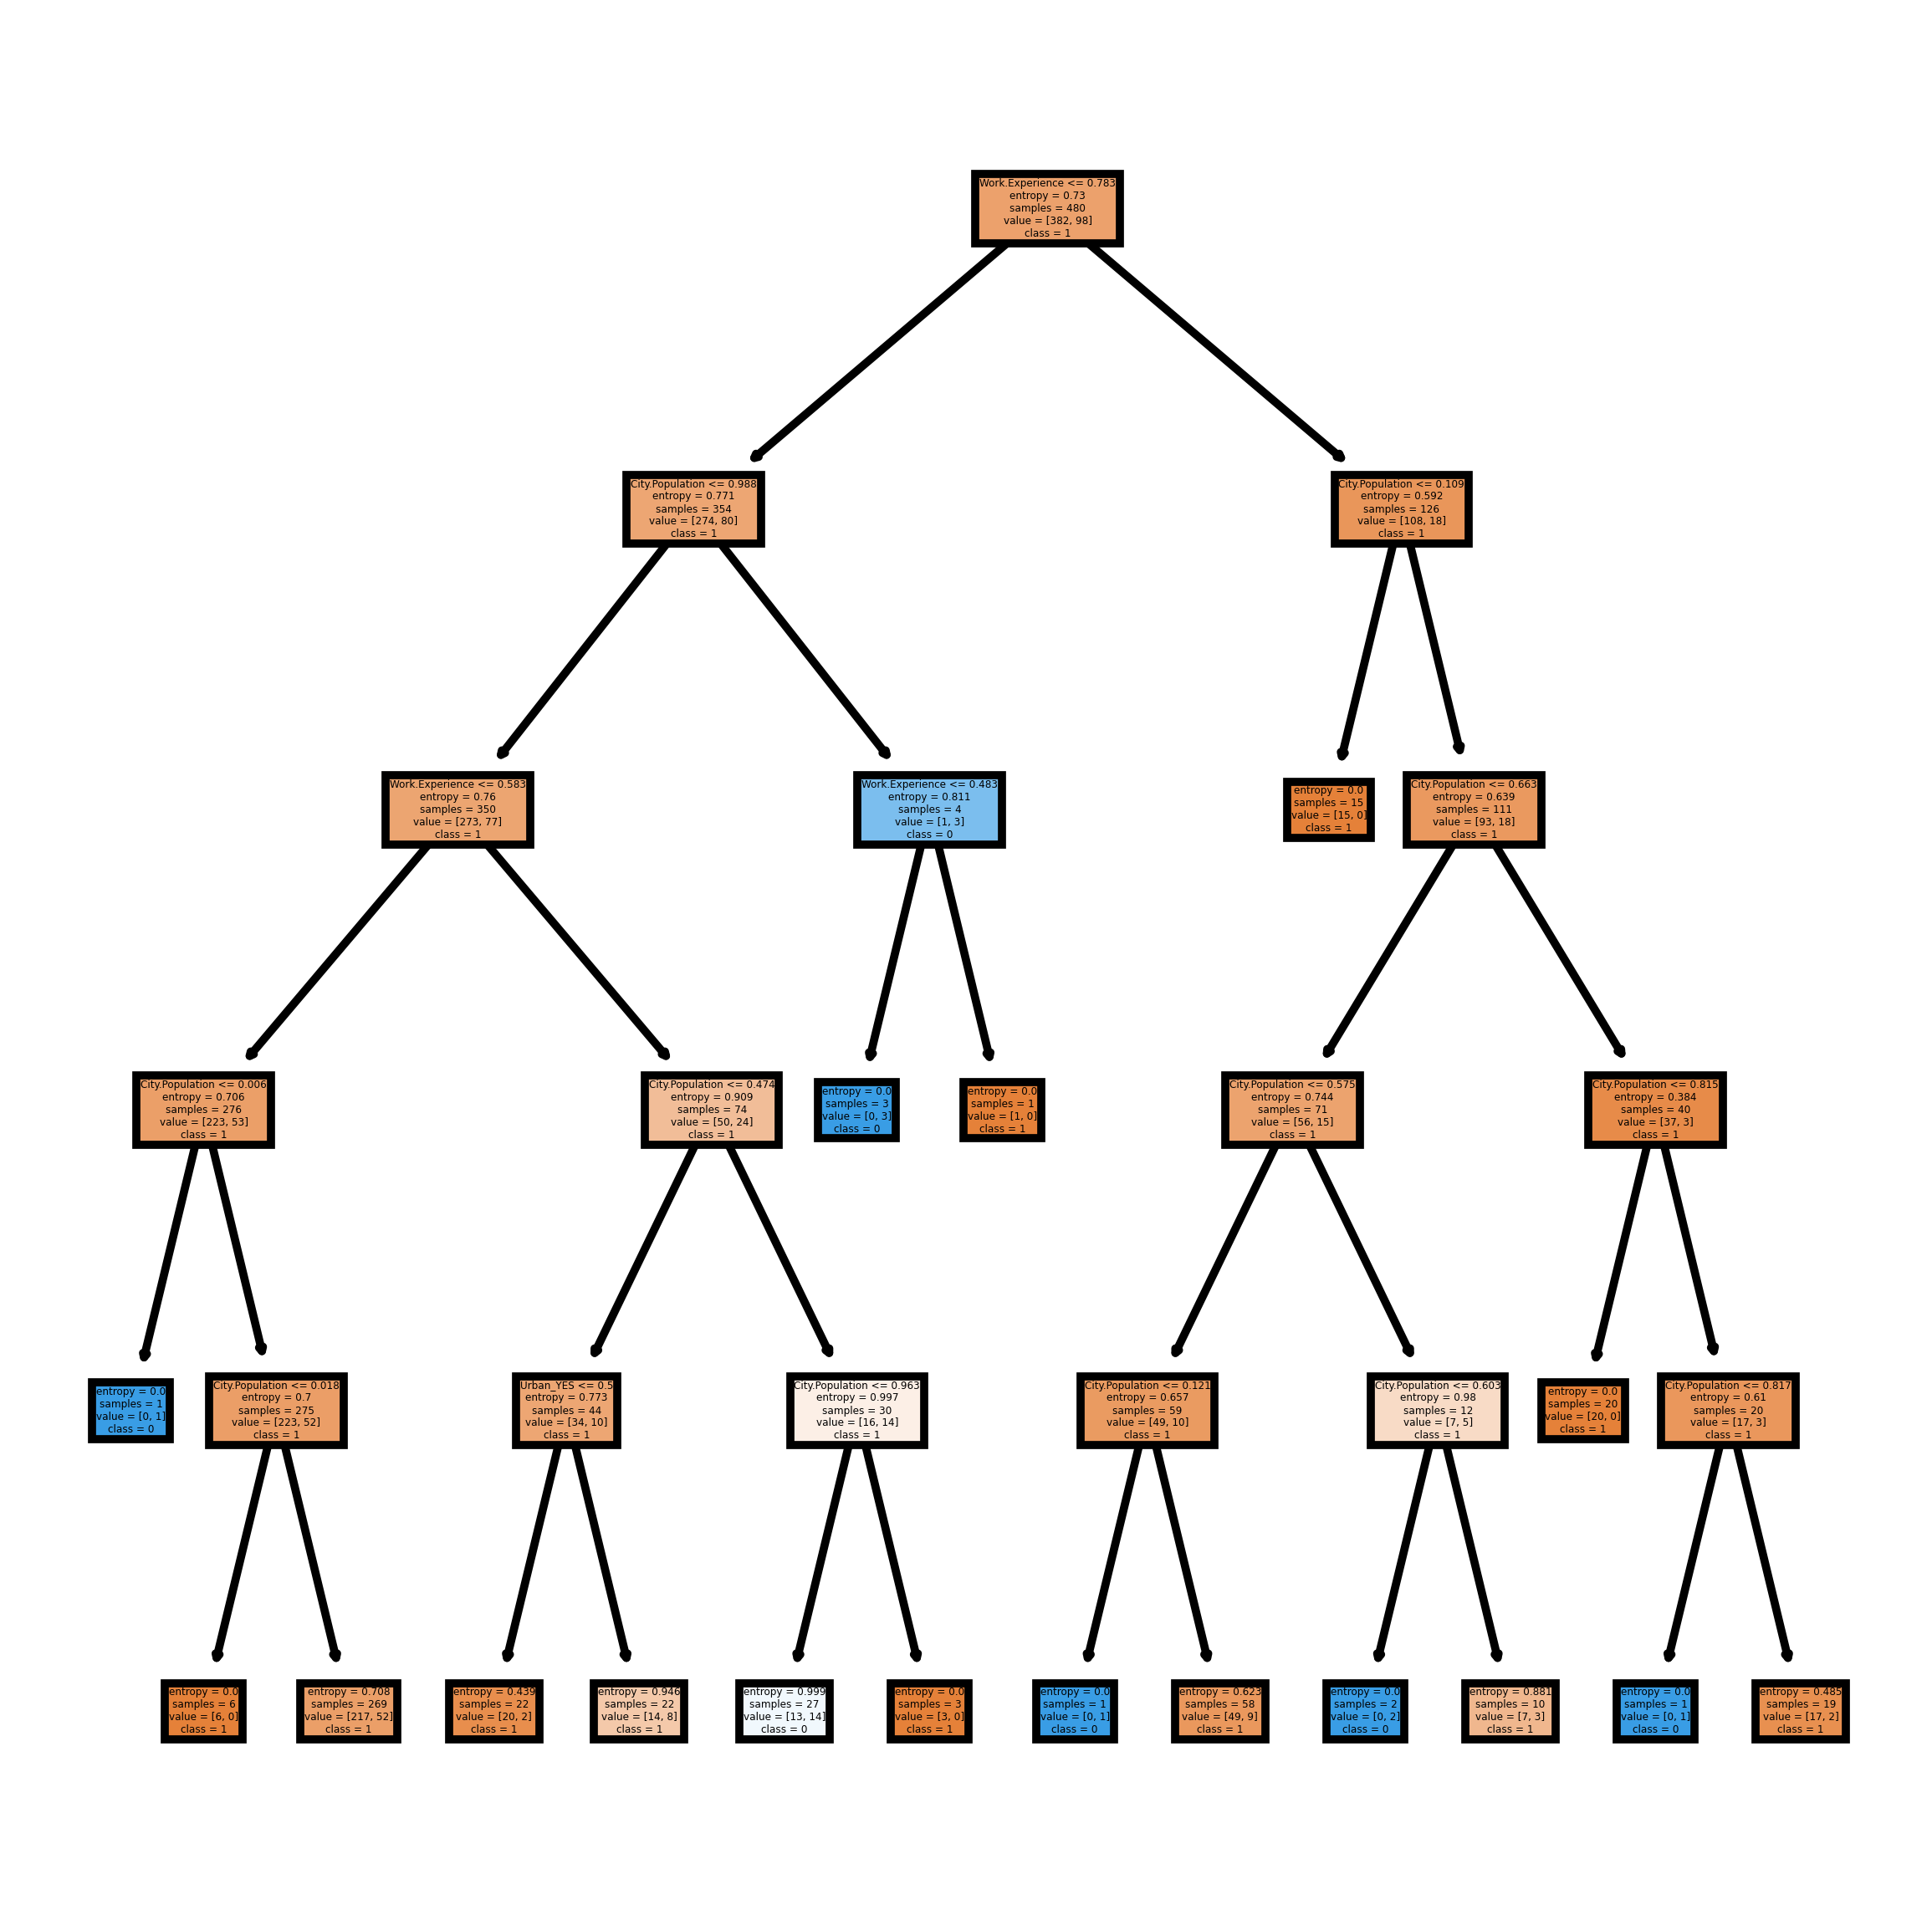

In [61]:
fn=['City.Population',
 'Work.Experience',
 'Undergrad_NO',
 'Undergrad_YES',
 'Marital.Status_Divorced',
 'Marital.Status_Married',
 'Marital.Status_Single',
 'Urban_NO',
 'Urban_YES']
cn=['1', '0']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=700)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);


In [59]:
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

0.0    106
1.0     14
dtype: int64

In [62]:
y_pred_dt = model.predict(x_test)
print("Decision Tree Results:")
print("Accuracy: ", accuracy_score(y_test, y_pred_dt))

Decision Tree Results:
Accuracy:  0.7166666666666667


# Building Decision Tree Classifier (CART) using Gini Criteria

In [63]:
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [64]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [65]:
y_pred_dt = model_gini.predict(x_test)
print("Decision Tree Results:")
print("Accuracy: ", accuracy_score(y_test, y_pred_dt))

Decision Tree Results:
Accuracy:  0.775
